# 📈⠀⠀<b>Projeto IV</b>⠀⠀⠀📉

## CAMPEONATO BRASILEIRO
<img src="Brasileirao.png" alt="Drawing" style="width: 400px;"/>


<p><b>Gregório Leite Gaio</b></p>
<p><b>Jaiana Santos da Silva Araújo</b></p>
<p><b>Ricardo Meca Parmezzano</b></p>

### <b><a><u>Índice</u></b></a>

<p><b>1. Análise do banco de dados</b></p>  
    <blockquote><p><i>1.1. Importações iniciais e função criada</i></p></blockquote>
<p><b>2. Conhecendo o banco de dados</b></p>
     <blockquote><p><i>2.1. Estatísticas do Campeonato Brasileiro</i></p></blockquote>
     <blockquote><p><i>2.2. Informações do dataframe</i></p></blockquote>
<p><b>3. Tratamento no banco de dados</b></p></blockquote>
     <blockquote><p><i>3.1. Analisando visualmente o conteúdo das colunas (Scatter by Matplotlib e Scatter by Pandas)</i></p></blockquote>
     <blockquote><p><i>3.2. Verificando a existência de outiliers nas variáveis (Boxplot by Matplotlib)</i></p></blockquote>
<p><b>4. Análise exploratória dos dados</b></p>
     <blockquote><p><i>4.1. Correlação do dataframe 1 (original) (Heatmap by Seaborn)</i></p></blockquote>
     <blockquote><p><i>4.2. Correlação do dataframe 2 (tratado) (Heatmap by Seaborn)</i></p></blockquote>
     <blockquote><p><i>4.3. 10 clubes que mais receberam cartão vermelho de 2003 a 2021 (Barras Horizontais by Seaborn)</i></p></blockquote>
     <blockquote><p><i>4.4. Histograma com a quantidade de passes por partida (Histograma e boxplot by Plotly)</i></p></blockquote>
     <blockquote><p><i>4.5. Adicionando colunas pontuação mandante e pontuação visitante</i></p></blockquote>
     <blockquote><p><i>4.6. Média dos pontos como mandante e visitante (Linhas by Matplotlib)</i></p></blockquote>
     <blockquote><p><i>4.7. Pontos do clube por temporada</i></p></blockquote>
     <blockquote><p><i>4.8. Visualização gráfica dos pontos dos clubes por temporada (Barras Verticais by Pandas)</i></p></blockquote>
     <blockquote><p><i>4.9. Aparições totais dos clubes nos campeonatos de 2003-2021 (Barras Verticais by Pandas)</i></p></blockquote>
     <blockquote><p><i>4.10. Porcentagem da quantidade de times por estados (Brasileirão 2003-2021) (Pie by Matplotlib)</i></p></blockquote>
     <blockquote><p><i>4.11. Quantidade de chutes a gol em função da média de gols (Barras Verticais by Plotly)</i></p></blockquote>
     <blockquote><p><i>4.12. Quantidade de chutes em função da média de gols (Barras Verticais by Plotly)</i></p></blockquote>


# <a>1. Análise do banco de dados</a> 🔎

### <i>1.1. Importações iniciais e função criada</i>   📥

<img src="Safra.png" alt="Drawing" style="width: 350px;"/>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

def pontuacao(gols_mandante, gols_visitante):   
         
    if int(gols_mandante) > int(gols_visitante):
        mandante = 3
        visitante = 0
        return mandante, visitante

    elif int(gols_mandante) < int(gols_visitante):
        mandante = 0
        visitante = 3
        return mandante, visitante

    else:
        mandante = visitante = 1
        return mandante, visitante

# <a>2. Conhecendo o banco de dados </a> 🕵🏻

### <i>2.1. Estatísticas do Campeonato Brasileiro</i> 📈 ⚽ 

In [2]:
df_estatistica = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv',encoding="ISO-8859-1")
df_full = pd.read_csv('campeonato-brasileiro-full.csv',encoding="ISO-8859-1")

### <i>2.2. Informações do dataframe</i> 😱

>* Fazendo análise dos dados do dataframe df_estatistica</b>

In [3]:
df_estatistica.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [4]:
df_estatistica.columns

Index(['partida_id', 'rodada', 'clube', 'chutes', 'chutes_no_alvo',
       'posse_de_bola', 'passes', 'precisao_passes', 'faltas',
       'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios'],
      dtype='object')

In [5]:
df_estatistica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       15290 non-null  int64 
 1   rodada           15290 non-null  int64 
 2   clube            15290 non-null  object
 3   chutes           15290 non-null  int64 
 4   chutes_no_alvo   15290 non-null  int64 
 5   posse_de_bola    6078 non-null   object
 6   passes           15290 non-null  int64 
 7   precisao_passes  6078 non-null   object
 8   faltas           15290 non-null  int64 
 9   cartao_amarelo   15290 non-null  int64 
 10  cartao_vermelho  15290 non-null  int64 
 11  impedimentos     15290 non-null  int64 
 12  escanteios       15290 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ MB


In [6]:
df_estatistica.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,3823.000000,20.196207,4.406082,1.049836,146.354938,5.291825,0.785873,0.042838,0.567953,1.801112
std,2206.993557,11.488873,6.702559,2.156661,209.141966,7.732749,1.366726,0.219844,1.184302,3.027748
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1912.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3823.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5734.000000,30.000000,10.000000,0.000000,360.000000,12.000000,1.000000,0.000000,1.000000,3.000000
max,7645.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


> * Fazendo análise dos dados do dataframe df_full

In [7]:
df_full.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [8]:
df_full.columns

Index(['ID', 'rodada', 'data', 'hora', 'dia', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_placar',
       'visitante_placar', 'mandante_estado', 'visitante_estado',
       'estado_vencedor'],
      dtype='object')

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

> * Eliminando colunas desnecessárias à análise exploratória do dataframe df_full

In [10]:
df_full.data = pd.to_datetime(df_full.data)
df_full['ano'] = df_full.data.dt.year
df_full = df_full.drop(['data','hora', 'dia', 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante', 'arena'], axis = 1)

In [11]:
df_full.describe()

,ID,rodada,mandante_placar,visitante_placar,ano
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,3823.000000,20.196207,1.554088,1.027338,2011.556573
std,2207.065737,11.489249,1.234262,1.030366,5.672267
min,1.000000,1.000000,0.000000,0.000000,2003.000000
25%,1912.000000,10.000000,1.000000,0.000000,2006.000000
50%,3823.000000,20.000000,1.000000,1.000000,2011.000000
75%,5734.000000,30.000000,2.000000,2.000000,2016.000000
max,7645.000000,46.000000,7.000000,7.000000,2021.000000


In [12]:
df_full.head()

,ID,rodada,mandante,visitante,vencedor,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,ano
0,1,1,Guarani,Vasco,Guarani,4,2,SP,RJ,SP,2003
1,2,1,Athletico-PR,Gremio,Athletico-PR,2,0,PR,RS,PR,2003
2,3,1,Flamengo,Coritiba,-,1,1,RJ,PR,-,2003
3,4,1,Goias,Paysandu,-,2,2,GO,PA,-,2003
4,5,1,Internacional,Ponte Preta,-,1,1,RS,SP,-,2003


In [13]:
df_full.columns

Index(['ID', 'rodada', 'mandante', 'visitante', 'vencedor', 'mandante_placar',
       'visitante_placar', 'mandante_estado', 'visitante_estado',
       'estado_vencedor', 'ano'],
      dtype='object')

In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7645 non-null   int64 
 1   rodada            7645 non-null   int64 
 2   mandante          7645 non-null   object
 3   visitante         7645 non-null   object
 4   vencedor          7645 non-null   object
 5   mandante_placar   7645 non-null   int64 
 6   visitante_placar  7645 non-null   int64 
 7   mandante_estado   7645 non-null   object
 8   visitante_estado  7645 non-null   object
 9   estado_vencedor   7645 non-null   object
 10  ano               7645 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 657.1+ KB


# <a>3.Tratamento no banco de dados</a>  📝 

### <i>3.1. Analisando visualmente o conteúdo das colunas </i> 🕵🏻

> * Através da análise exploratória dos dados, notamos que havia a presença de Nan´s e valores nulos até a linha 12250.
<br> Os gráficos abaixo ilustram os dados antes do tratamento.<br><br>
> * Não foi possível plotar todas as colunas por conta de valores conflitantes como strings de porcentagem e NaN's presentes no dataframe.

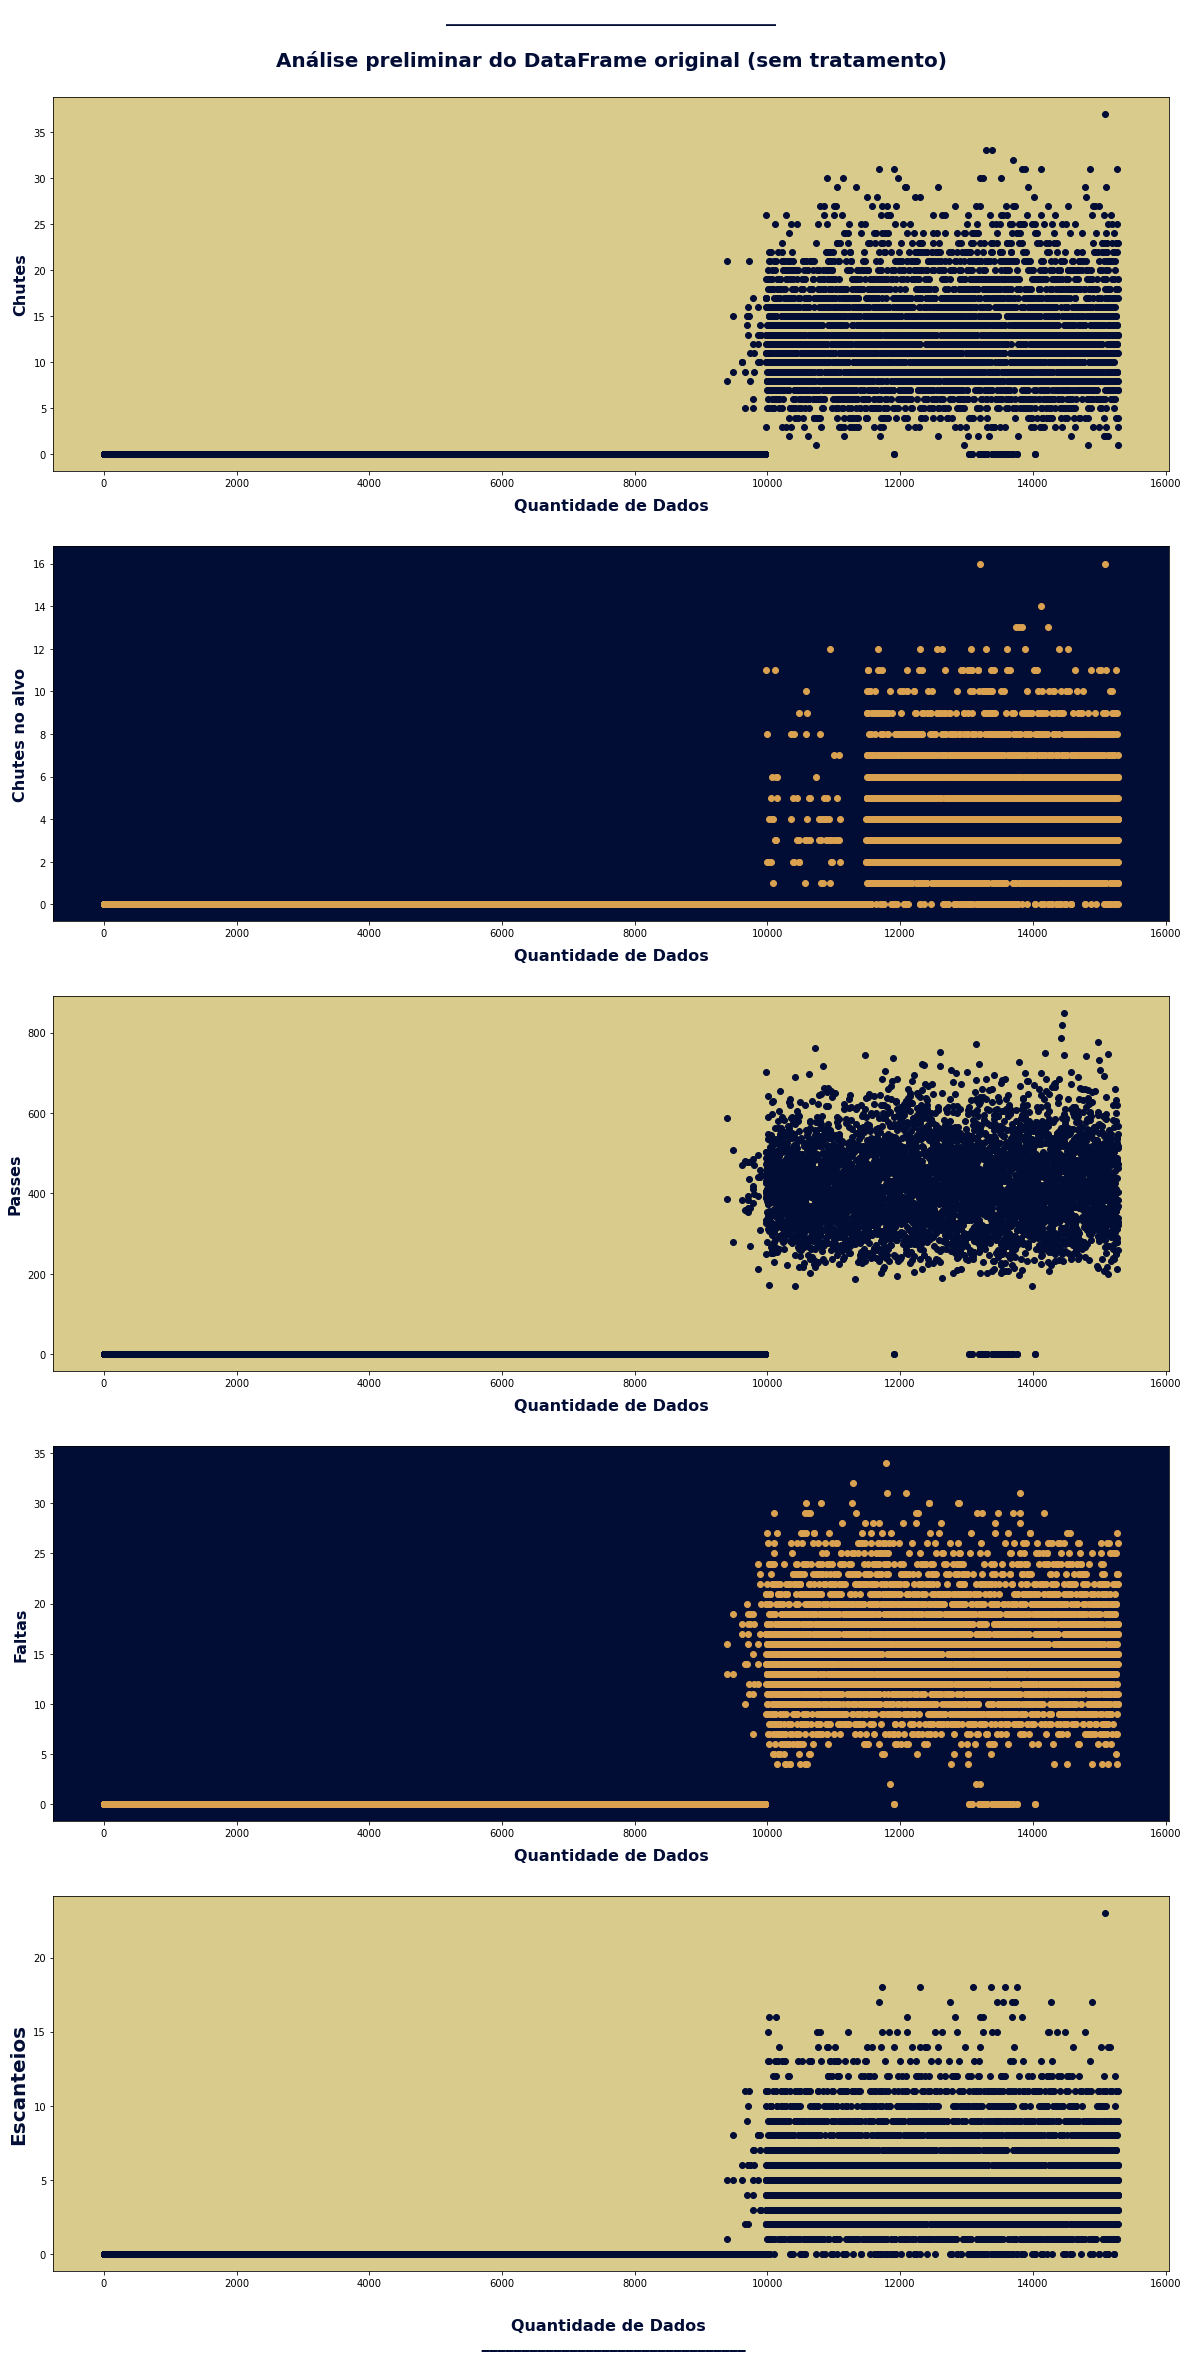

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(20,40))

fig.subplots_adjust(hspace=0.2)
fig.set_facecolor('#FFFFFF')

axs[0].scatter(df_estatistica.index, 'chutes', data = df_estatistica, ).set_color('#020D36')
axs[1].scatter(df_estatistica.index, 'chutes_no_alvo', data = df_estatistica ).set_color('#DAA250')
axs[2].scatter(df_estatistica.index, 'passes', data = df_estatistica ).set_color('#020D36')
axs[3].scatter(df_estatistica.index, 'faltas', data = df_estatistica ).set_color('#DAA250')
axs[4].scatter(df_estatistica.index, 'escanteios', data = df_estatistica ).set_color('#020D36')

axs[0].set_facecolor('#D8CB8C')
axs[1].set_facecolor('#020D36')
axs[2].set_facecolor('#D8CB8C')
axs[3].set_facecolor('#020D36')
axs[4].set_facecolor('#D8CB8C')

axs[0].set_title('_________________________________\n \nAnálise preliminar do DataFrame original (sem tratamento)',
                 fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30);
axs[0].set_xlabel('Quantidade de Dados', fontsize = 16, labelpad =10,  color = '#020D36',fontweight = 'bold');
axs[0].set_ylabel('Chutes', fontsize = 16, labelpad = 5, color = '#020D36', fontweight = 'bold');

axs[1].set_xlabel('Quantidade de Dados', fontsize = 16, labelpad =10,  color = '#020D36', fontweight = 'bold');
axs[1].set_ylabel('Chutes no alvo', fontsize = 16, labelpad = 5, color = '#020D36',fontweight = 'bold');

axs[2].set_xlabel('Quantidade de Dados', fontsize = 16, labelpad =10,  color = '#020D36', fontweight = 'bold');
axs[2].set_ylabel('Passes', fontsize = 16, labelpad = 5, color = '#020D36', fontweight = 'bold');

axs[3].set_xlabel('Quantidade de Dados', fontsize = 16, labelpad =10,  color = '#020D36', fontweight = 'bold');
axs[3].set_ylabel('Faltas', fontsize = 16, labelpad = 5, color = '#020D36', fontweight = 'bold');

axs[4].set_xlabel('Quantidade de Dados \n _________________________________\n',fontsize = 16, fontweight = 'bold', color = '#020D36', labelpad = 30);
axs[4].set_ylabel('Escanteios', fontsize = 20, labelpad = 5, color = '#020D36', fontweight = 'bold');


> * Após verificar a existência de strings contendo o texto 'None', foi feito um tratamento para a conversão destes valores para Nan, conforme código a seguir:

In [16]:
df_estatistica.mask(df_estatistica == 'None', np.NaN, inplace=True)

> * Retirando todas as linhas que contém Nan. A opção pela retirada deveu-se ao fato de as demais variáveis das linhas também serem Nan´s

In [17]:
df_estatistica = df_estatistica.dropna().reset_index()

> * Plotando o gráfico do tipo Scatter após a limpeza dos dados, após tratamento da coluna precisão de passes e posse de bola

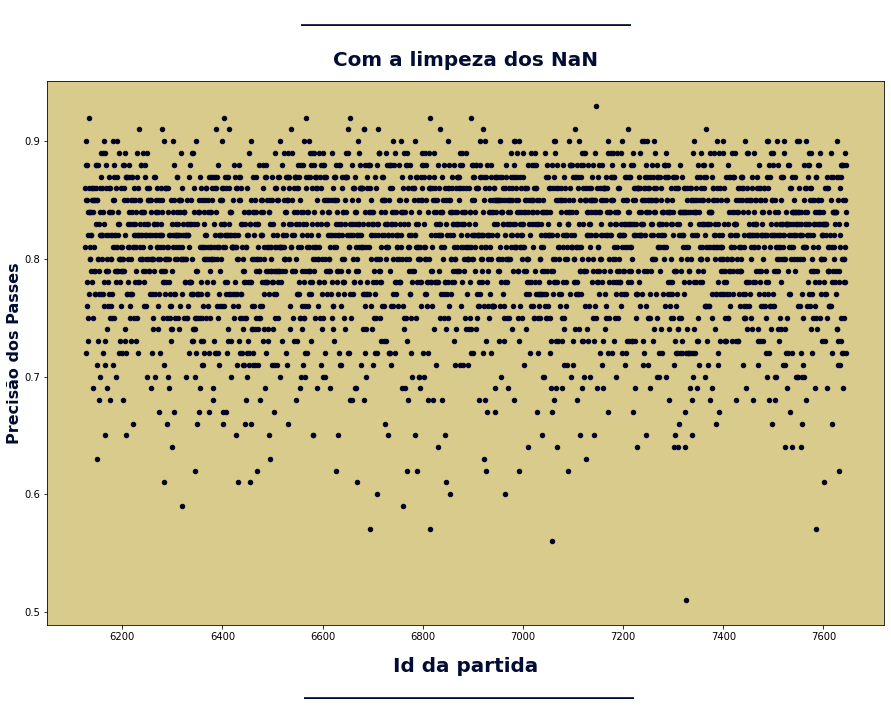

In [18]:
df_estatistica['precisao_passes'] = df_estatistica['precisao_passes'].str.rstrip('%').astype('float') / 100
df_estatistica['posse_de_bola'] = df_estatistica['posse_de_bola'].str.rstrip('%').astype('float') / 100

com_limpeza = df_estatistica.plot(x='partida_id', y='precisao_passes', kind='scatter',figsize=(15,10),color = '#010326');
com_limpeza.set_xlabel('Id da partida\n _________________________________\n', labelpad=15, fontsize = 20, color = '#020D36', fontweight = 'bold')
com_limpeza.set_ylabel('Precisão dos Passes', labelpad=2, fontsize = 16, color = '#020D36', fontweight = 'bold')
com_limpeza.set_title('_________________________________\n \nCom a limpeza dos NaN', pad=15, fontsize = 20, color = '#020D36', fontweight = 'bold')
com_limpeza.set_facecolor('#D8CB8C')

### <i>3.2. Verificando a existência de outiliers nas variáveis </i> 🕵️‍♀️

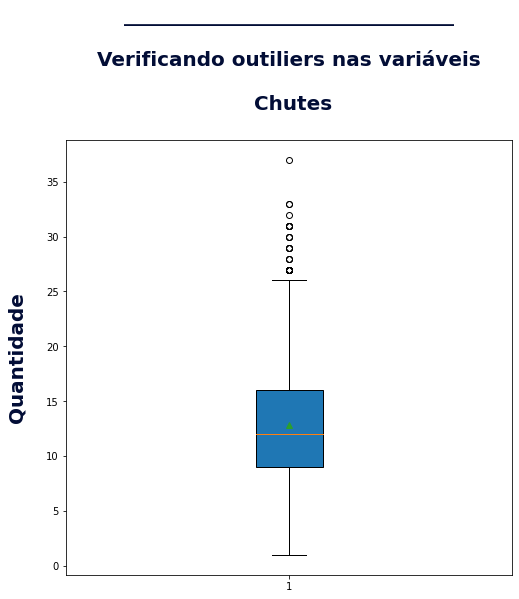

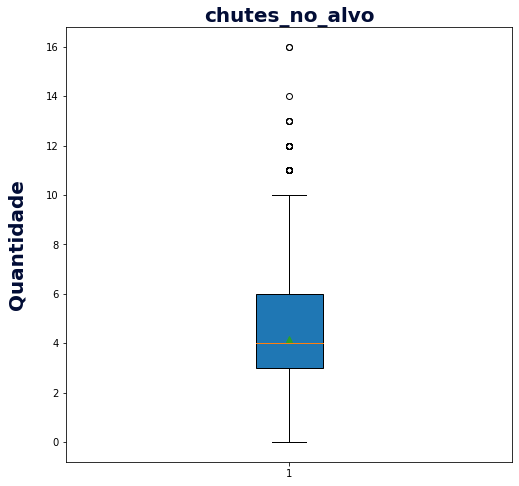

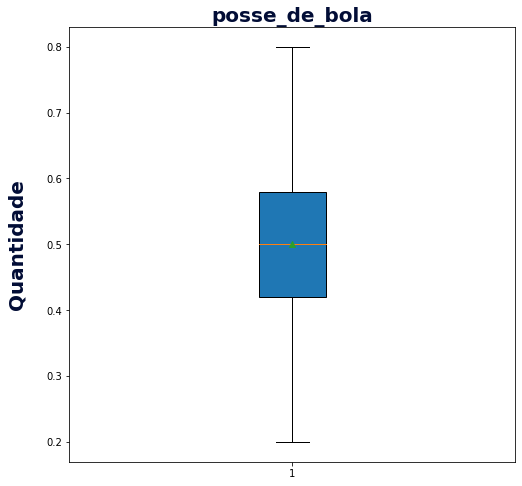

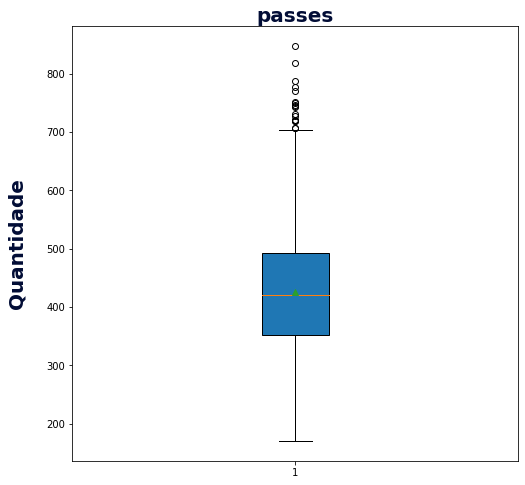

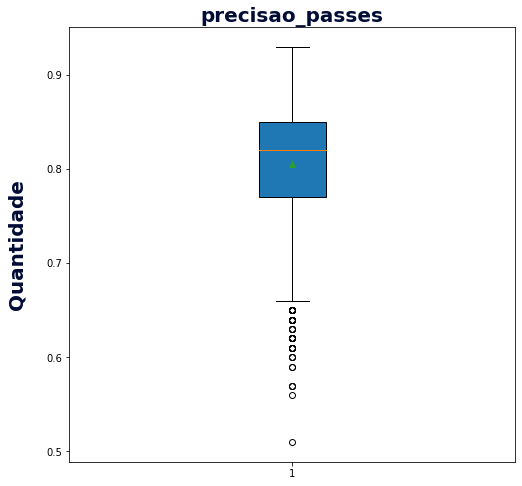

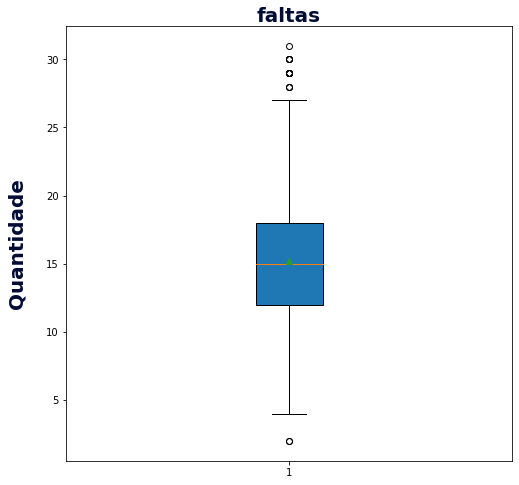

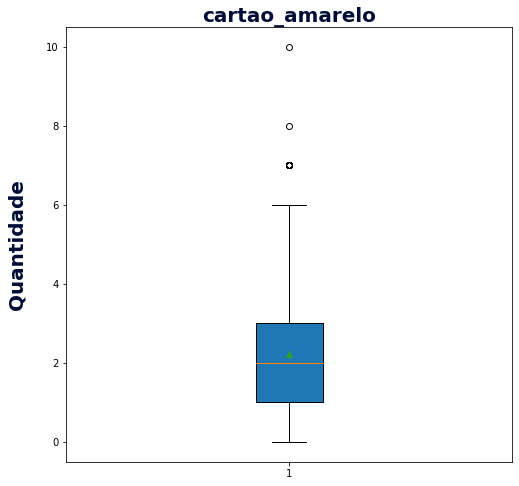

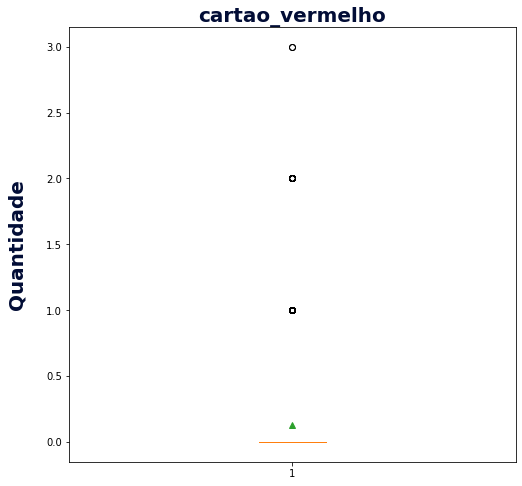

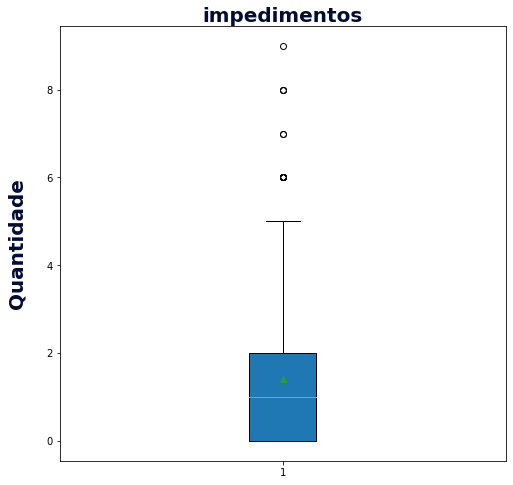

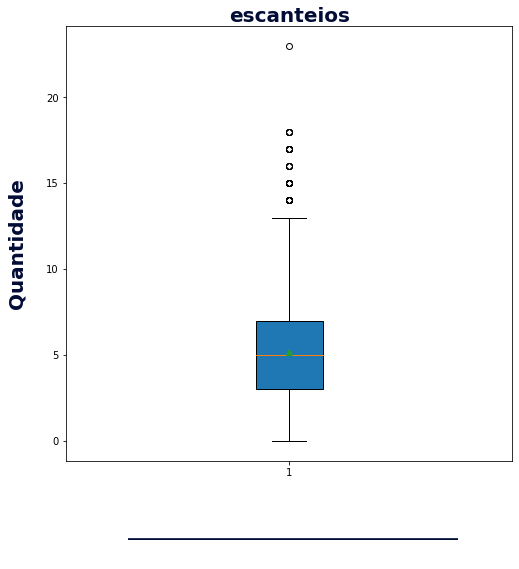

In [19]:
for coluna in df_estatistica.columns[4:]:
  plt.figure(figsize = (8, 8))
  
  plt.boxplot(df_estatistica[coluna], showmeans=True, patch_artist=True)
  plt.title(coluna, fontsize = 15, pad = 20)
  plt.title(coluna, fontsize = 20, fontweight = 'bold', color = '#020D36', pad = -15)
  plt.ylabel('Quantidade',fontsize = 20, fontweight = 'bold', color = '#020D36', labelpad = 20)
  if coluna == 'chutes':
    plt.title('_________________________________\n \nVerificando outiliers nas variáveis\n\n Chutes', fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30)
  elif coluna == 'escanteios':
    plt.xlabel('\n _________________________________\n',fontsize = 20, fontweight = 'bold', color = '#020D36', labelpad = 20)



# <a>4. Análise Exploratória dos Dados</a>

### <i> 4.1. Correlação do dataframe 1 (original) </i> 🔀

* Grande correlação entre:
<br>* posse de bola e passes (0,88);
<br>* passes e precisão de passes (0,8);
<br>* posse de bola e precisão de passes (0,72);
<br>* chutes e chutes no alvo (0,65).

Text(0.5, 1.0, '_________________________________\n \nCorrelação do dataframe 1 (original)')

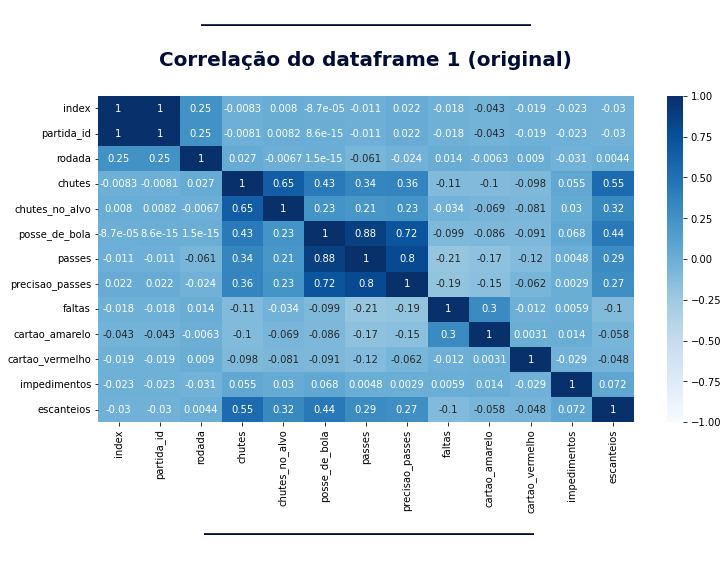

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_estatistica.corr(),cmap="Blues", vmin = -1, vmax = 1, annot = True);
plt.xlabel('\n _________________________________\n',fontsize = 20, fontweight = 'bold', color = '#020D36', labelpad = -20)
plt.title('_________________________________\n \nCorrelação do dataframe 1 (original)', fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30)

### <i>4.2. Correlação do dataframe 2 (tratado)</i> 🔀📈

* Notamos que há uma correlação inversa entre pontuação mandante e pontuação visitante, ou seja, se o mandante faz pontos, o visitante não faz (exceto empates);
* Quanto mais gols, maior a pontuação (Visitante: 0,65 Mandante: 0,67).

C:\Users\ricam\AppData\Local\Temp\ipykernel_18228\3287499747.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_copia_corrigido = df_full_copia[bool1][bool2]
C:\Users\ricam\AppData\Local\Temp\ipykernel_18228\3287499747.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_copia_corrigido = df_full_copia_corrigido[bool1][bool2]


Text(0.5, 1.0, '_________________________________\n \nCorrelação do dataframe 2 (tratado)')

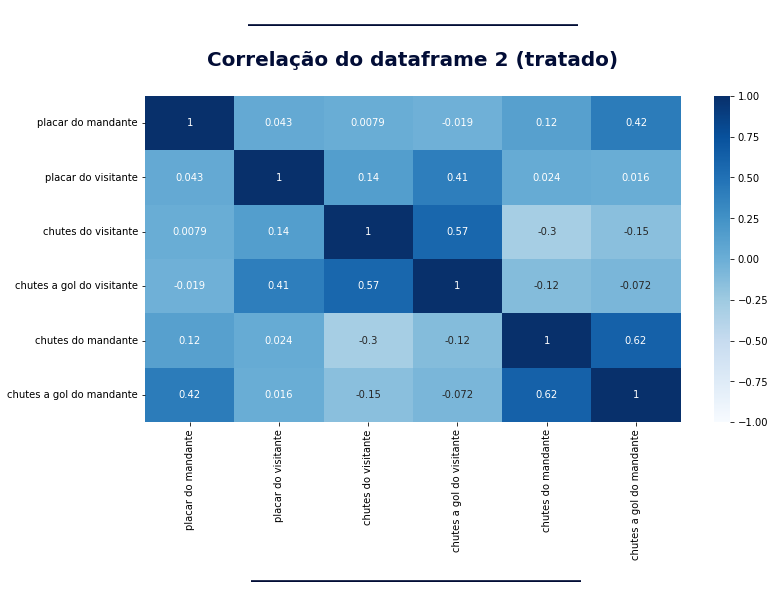

In [21]:
df_estatistica_raw = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv', delimiter=',')

df_estatistica_mandante = df_estatistica_raw[df_estatistica_raw.index %2 ==0]
df_estatistica_visitante = df_estatistica_raw[df_estatistica_raw.index %2 ==1]
df_estatistica_visitante.reset_index(drop= True, inplace=True)
df_estatistica_mandante.reset_index(drop= True, inplace=True)

df_full_copia = df_full.copy()
df_full_copia[['chutes visitante', 'chutes a gol visitante']] = df_estatistica_visitante[['chutes', 'chutes_no_alvo']]
df_full_copia[['chutes mandante', 'chutes a gol mandante']] = df_estatistica_mandante[['chutes', 'chutes_no_alvo']]
df_full_copia['clube mandante'] = df_estatistica_mandante['clube']
df_full_copia['clube visitante'] = df_estatistica_visitante['clube']

bool1 = df_full_copia['mandante_placar'] > 0
bool2 = df_full_copia['chutes a gol mandante'] >= df_full_copia['mandante_placar']
df_full_copia_corrigido = df_full_copia[bool1][bool2]

bool1 = df_full_copia['visitante_placar'] > 0
bool2 = df_full_copia['chutes a gol visitante'] >= df_full_copia['visitante_placar']
df_full_copia_corrigido = df_full_copia_corrigido[bool1][bool2]
df_full_copia_corrigido.drop(columns = ['ID', 'ano', 'rodada'], axis = 1, inplace = True)
df_full_copia_corrigido.rename(columns= 
{'mandante_placar':'placar do mandante','visitante_placar':'placar do visitante','mandante_estado':'estado do mandante',
'visitante_estado':'estado do visitante', 'estado_vencedor':'estado do vencedor','Pontuacao Mandante':'pontuacao do mandante',
'Pontuacao Visitante':'pontuacao do visitante', 'chutes visitante': 'chutes do visitante', 'chutes mandante': 'chutes do mandante',
 'chutes a gol visitante':'chutes a gol do visitante', 'chutes a gol mandante':'chutes a gol do mandante'}, inplace = True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_full_copia_corrigido.corr(),cmap="Blues", vmin = -1, vmax = 1, annot = True);
plt.xlabel('\n _________________________________\n',fontsize = 20, fontweight = 'bold', color = '#020D36', labelpad = -20)
plt.title('_________________________________\n \nCorrelação do dataframe 2 (tratado)', fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30)


### <i>4.3. 10 clubes que mais receberam cartão vermelho de 2003 a 2021</i> 🟥

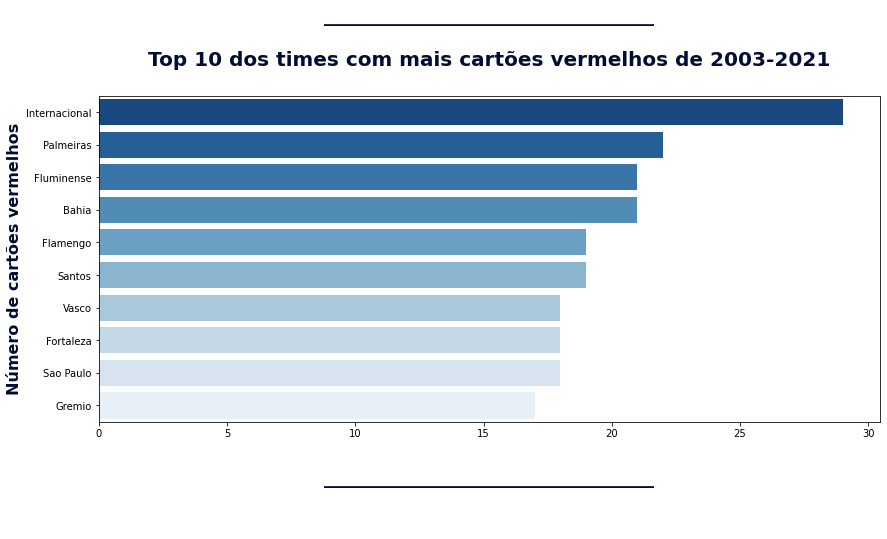

In [22]:
top10_cart_vermelho = df_estatistica.groupby(by = 'clube')['cartao_vermelho'].sum().sort_values(ascending=False)[:10]
top10_cart_vermelho = pd.DataFrame(data = top10_cart_vermelho).rename(columns={'cartao_vermelho': 'quant_cartao_vermelho'})
top10_cart_vermelho
plt.figure(figsize=(14,6))
ax = sns.barplot(x= 'quant_cartao_vermelho',y=top10_cart_vermelho.index, data=top10_cart_vermelho, palette='Blues_r')
ax.set_title('_________________________________\n \nTop 10 dos times com mais cartões vermelhos de 2003-2021',
                 fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30);
ax.set_xlabel('_________________________________\n \n', fontsize =20, color = '#020D36', labelpad = 30, fontweight = 'bold')
ax.set_ylabel('Número de cartões vermelhos',fontsize = 16, color = '#020D36', fontweight = 'bold')
plt.show()

### <i> 4.4. Histograma com a quantidade de passes por partida   </i>  🧮

In [23]:
hist = px.histogram(data_frame=df_estatistica, x = 'passes', nbins=100, histnorm='percent', marginal = 'box')
hist.update_layout(
    xaxis_title= {
        'text':'<b>Passes <br>_________________________________<br>⠀',
        'font_color': '#020D36',
        'font_size':20},
    yaxis_title={
        'text':'<b>Porcentagem',
        'font_color': '#020D36',
        'font_size':20},
    title={
        'text': '<b>_________________________________<br>Histograma com a quantidade de passes por partida (junto com boxplot)',
        'x': 0.5,
        'y': 0.96,
        'font_color': '#020D36',
        'font_size':20},
    template = 'simple_white'
    
    )

### <i> 4.5. Adicionando colunas pontuação mandante e pontuação visitante </i> ➕

In [24]:
for i in range (len(df_full)):
    mandante , visitante = pontuacao(df_full['mandante_placar'].values[i], df_full['visitante_placar'].values[i])
    df_full.loc[i,'Pontuacao Mandante'] = mandante
    df_full.loc[i,'Pontuacao Visitante'] = visitante

pontuacao_em_casa = pd.DataFrame(df_full.pivot_table(index='mandante',columns='ano',values='Pontuacao Mandante', aggfunc='sum'))
pontuacao_fora_de_casa = pd.DataFrame(df_full.pivot_table(index='visitante',columns='ano',values='Pontuacao Visitante', aggfunc='sum'))
pontuacao_em_casa = pd.DataFrame(df_full.pivot_table(index=['mandante'],columns=['ano'],values='Pontuacao Mandante', aggfunc='sum'))

### <i> 4.6. Média dos pontos como mandante e visitante</i>  📉

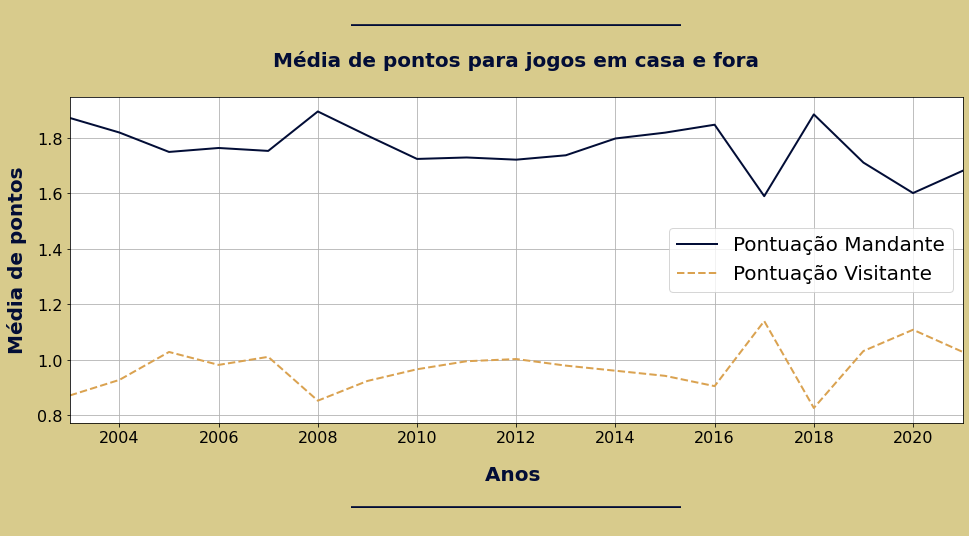

In [25]:
df_full.groupby('ano').mean()


plt.figure(figsize=(16,6), facecolor = '#D8CB8C')
plt.plot('Pontuacao Mandante', data = df_full.groupby('ano').mean(), c = '#020D36', ls = '-', lw = 2) 
plt.plot('Pontuacao Visitante', data = df_full.groupby('ano').mean(), c = '#DAA250', ls = '--', lw = 2)
plt.xlabel('Anos \n_________________________________\n', color = '#020D36', labelpad = 20,  fontsize = 20, fontweight = 'bold')
plt.ylabel('Média de pontos', color = '#020D36', labelpad = 10, fontsize = 20, fontweight = 'bold')
plt.title('_________________________________\n \nMédia de pontos para jogos em casa e fora',
                 fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30)
plt.grid()
plt.xlim([2003, 2021])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(labels=['Pontuação Mandante','Pontuação Visitante'], fontsize = (20));

### <i>4.7. Pontos do clube por temporada </i> 🧾

> * Criamos um novo dataframe apenas com as pontuações anuais dos clubes, contabilizando os pontos dos mandantes e os pontos dos visitantes.

In [26]:
pontuacao_em_casa = pd.DataFrame(df_full[df_full['ano']== 2003].pivot_table(index=['mandante'],values='Pontuacao Mandante', aggfunc='sum'))
pontuacao_fora_de_casa = pd.DataFrame(df_full[df_full['ano']== 2003].pivot_table(index=['visitante'],values='Pontuacao Visitante', aggfunc='sum'))
pontos = pontuacao_em_casa['Pontuacao Mandante'] + pontuacao_fora_de_casa['Pontuacao Visitante'];
pontos = pontos.reset_index()
pontos.rename(columns={'mandante':'clube', 0:2003}, inplace=True)

for i in range(2004,2022):
    pontuacao_em_casa = pd.DataFrame(df_full[df_full['ano']== i].pivot_table(index=['mandante'],values='Pontuacao Mandante', aggfunc='sum'))
    pontuacao_fora_de_casa = pd.DataFrame(df_full[df_full['ano']==i].pivot_table(index=['visitante'],values='Pontuacao Visitante', aggfunc='sum'))
    pontos_aux = pd.DataFrame(pontuacao_em_casa['Pontuacao Mandante'] + pontuacao_fora_de_casa['Pontuacao Visitante']).reset_index()
    pontos_aux.rename(columns={'mandante':'clube', 0:i}, inplace=True)
    pontos = pontos.merge(pontos_aux, how='outer', on = 'clube');

### <i> 4.8. Visualização gráfica dos pontos dos clubes por temporada </i> 📊

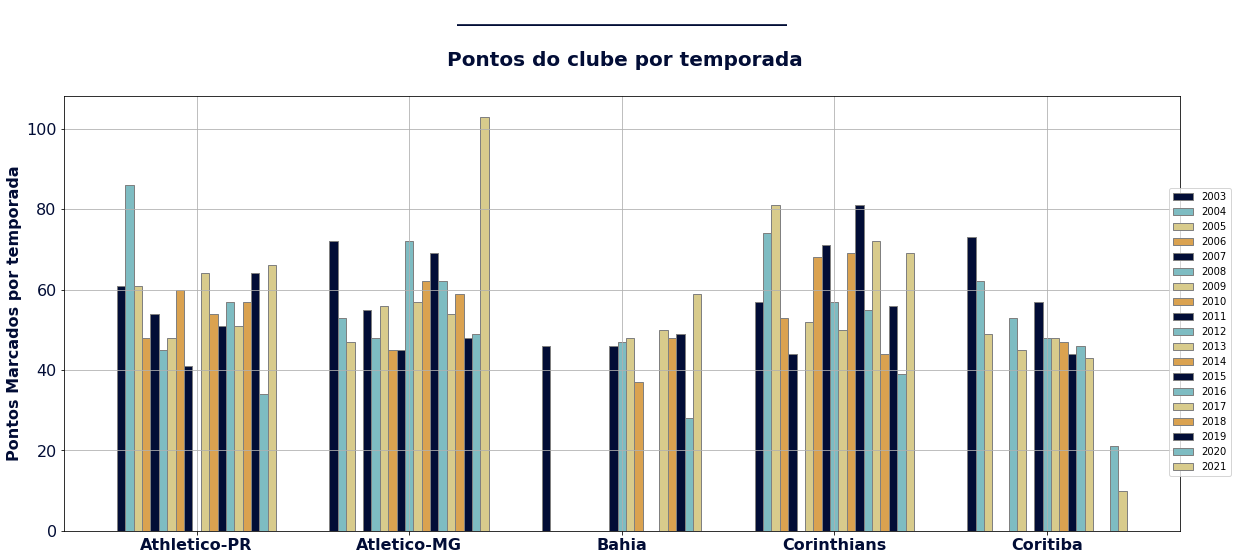

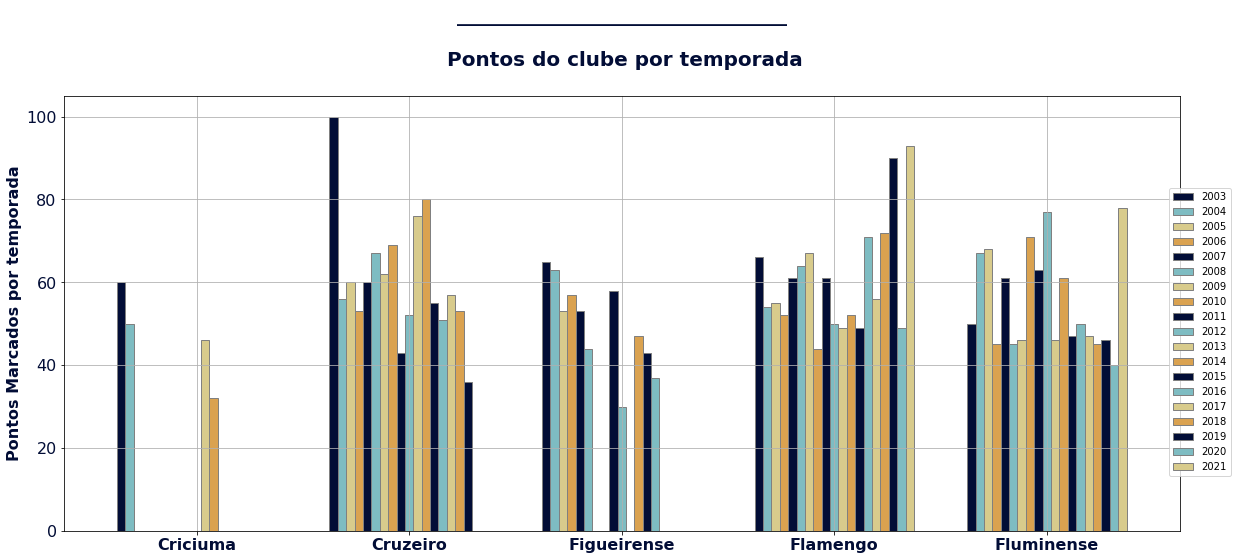

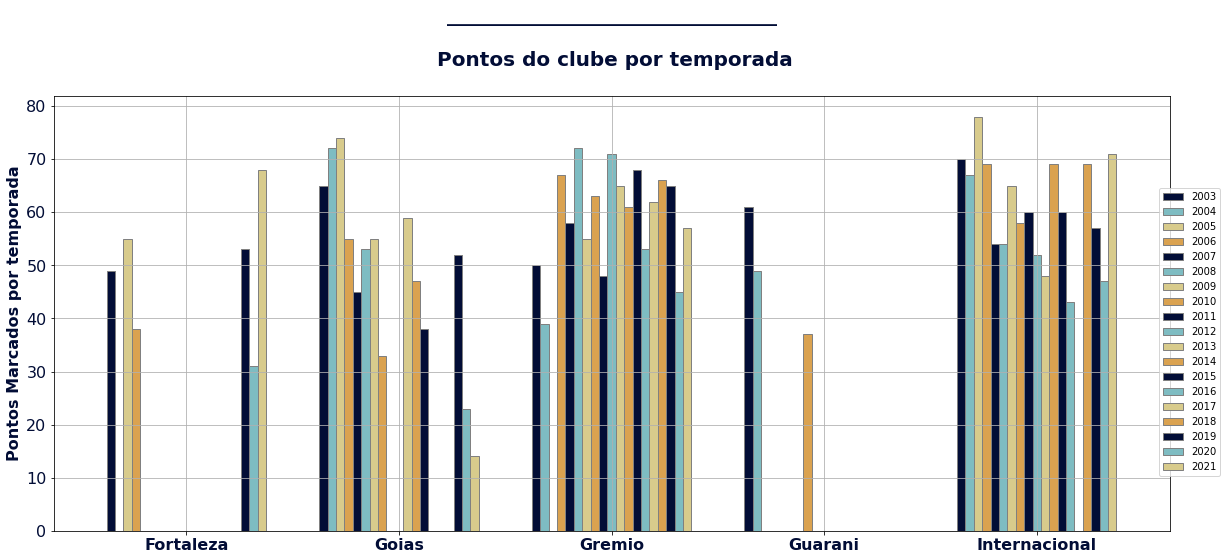

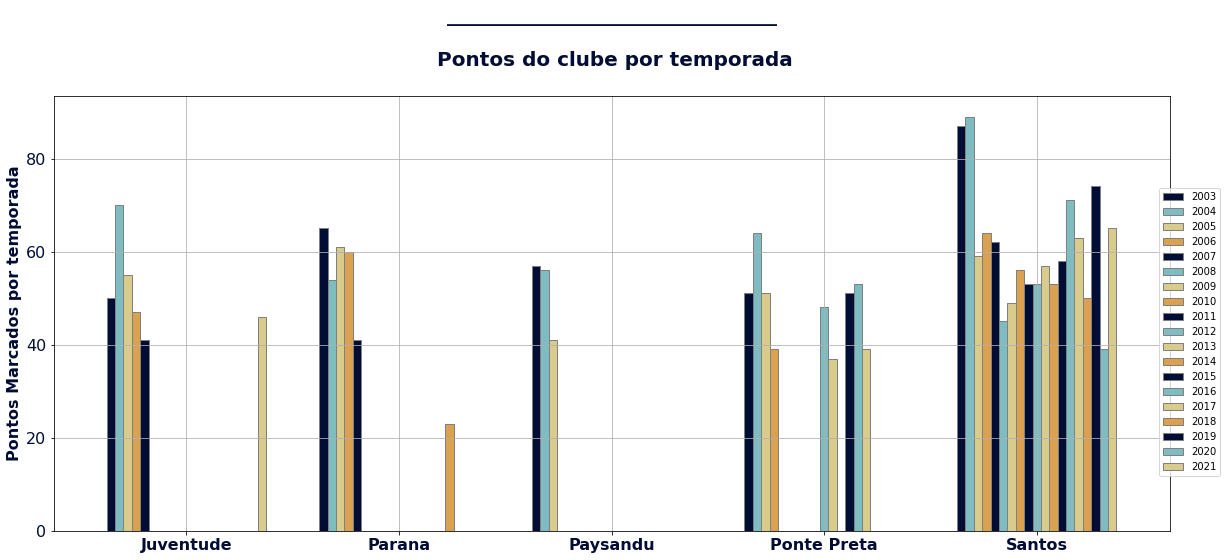

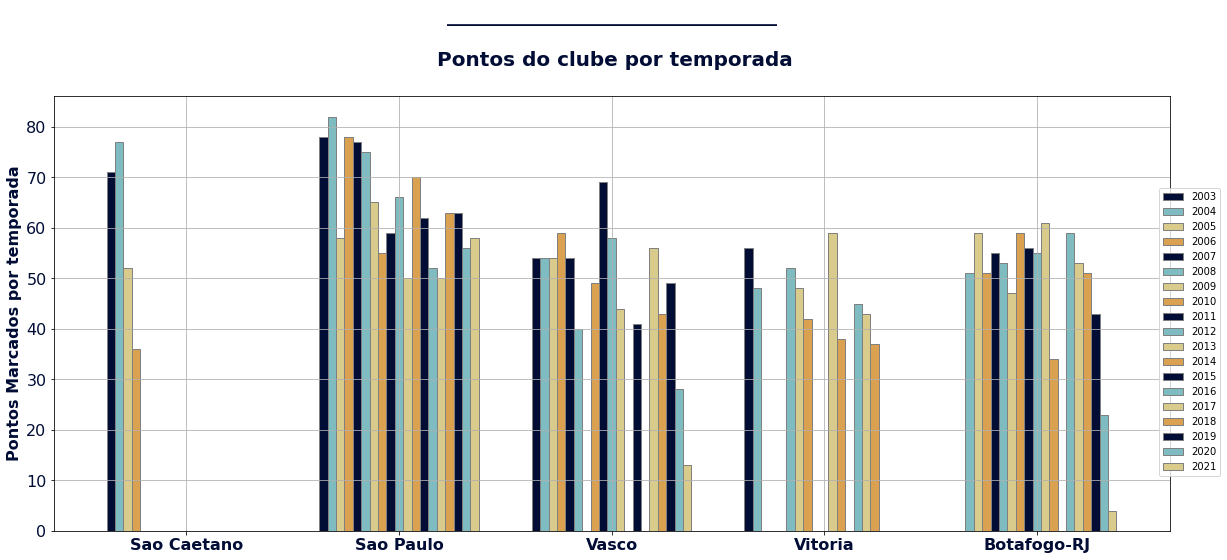

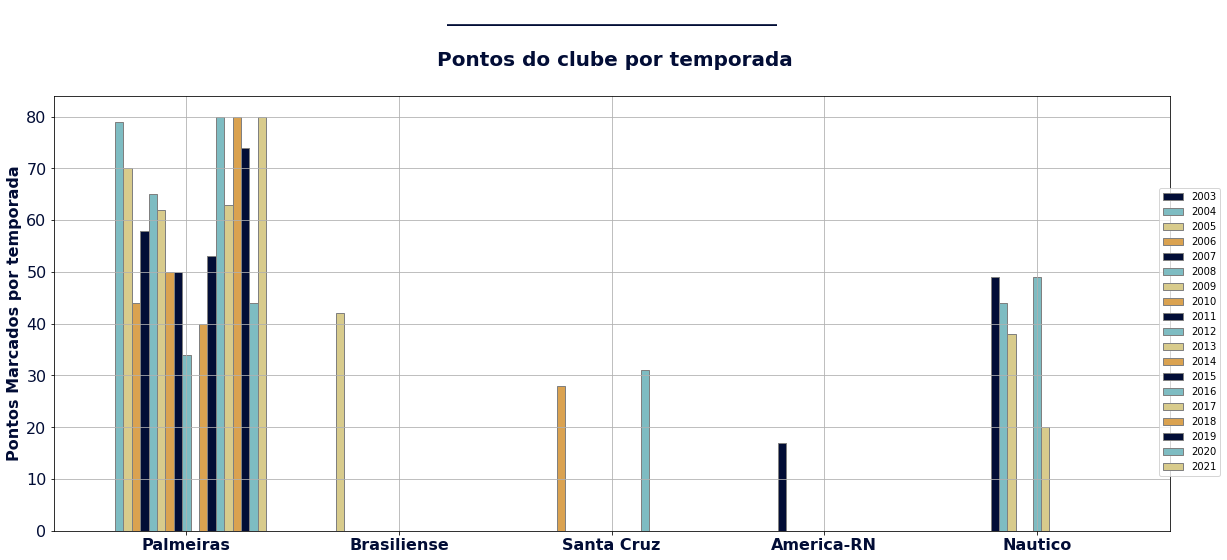

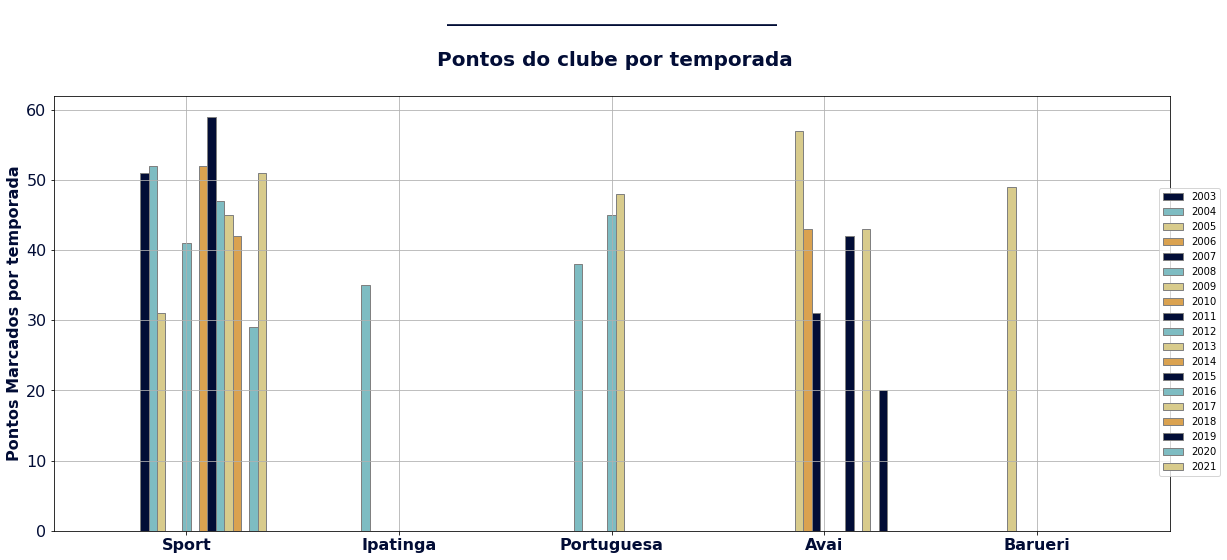

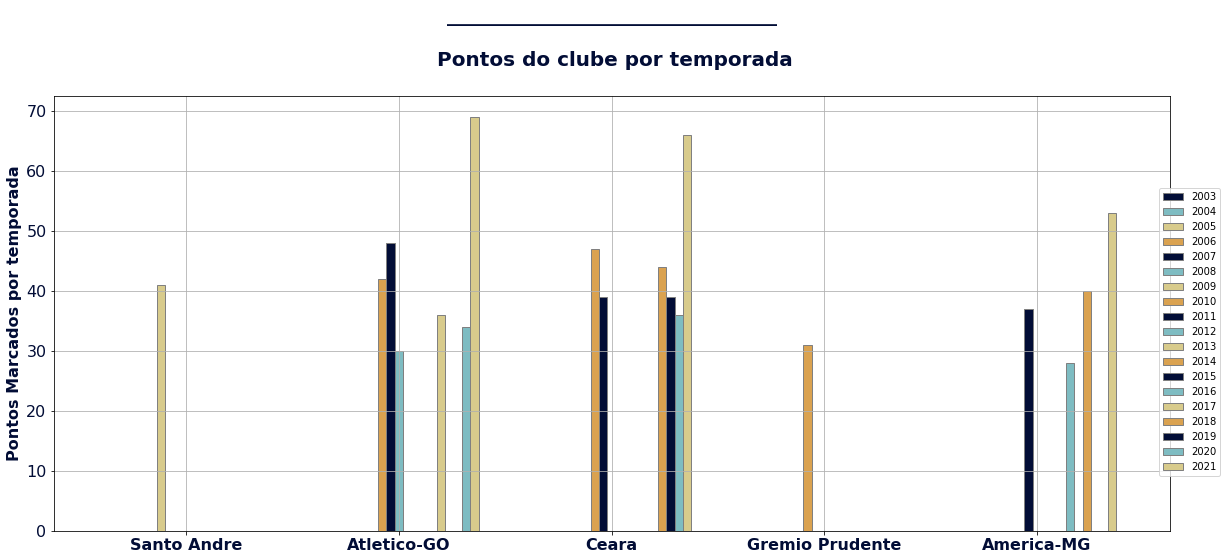

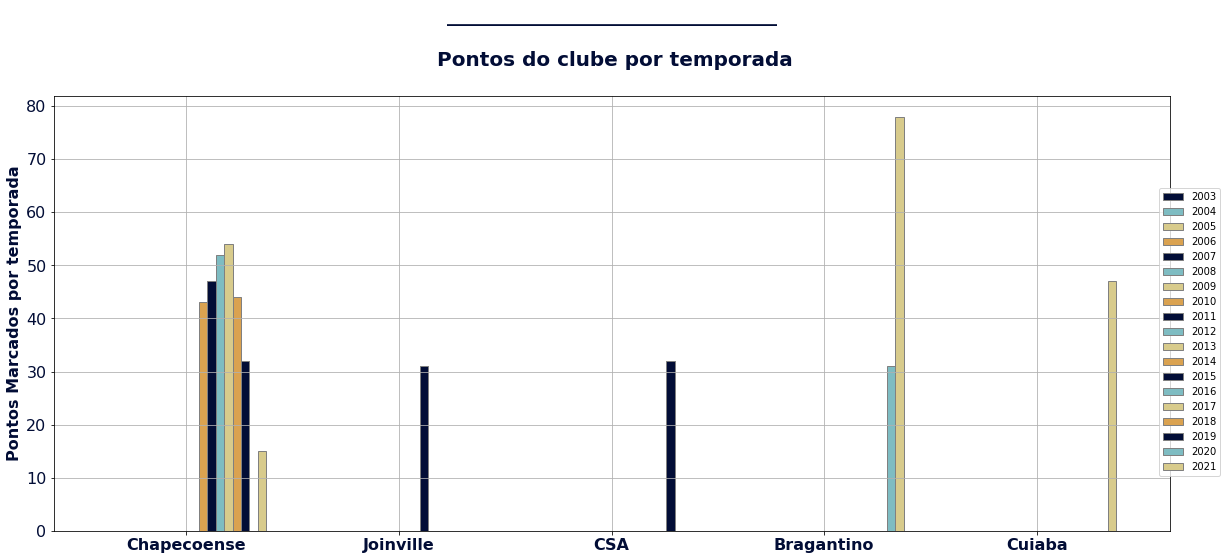

In [27]:
cores = ['#020D36','#7EBCC2','#D8CB8C','#DAA250']
j= 5
for i in range(0,45,5):
    pontos[i:j].plot(x = 'clube', kind = 'bar', figsize = (20,8), edgecolor= 'grey', width=0.75, rot = 0, color = cores)
    plt.title('_________________________________\n \n Pontos do clube por temporada', fontsize = 20, fontweight = 'bold', color = '#020D36', pad = 30)
    plt.xlabel('')
    plt.ylabel('Pontos Marcados por temporada', color = '#020D36', fontweight = 'bold', fontsize = 16)
    plt.grid()
    plt.xticks(color = '#020D36', fontweight = 'bold', fontsize = 16)
    plt.yticks(color = '#020D36', fontsize = 16)
    plt.legend(bbox_to_anchor = (1.05, 0.80))
    plt.show()
    j+=5


### <i>4.9. Aparições totais dos clubes nos campeonatos de 2003-2021 </i> 🔍

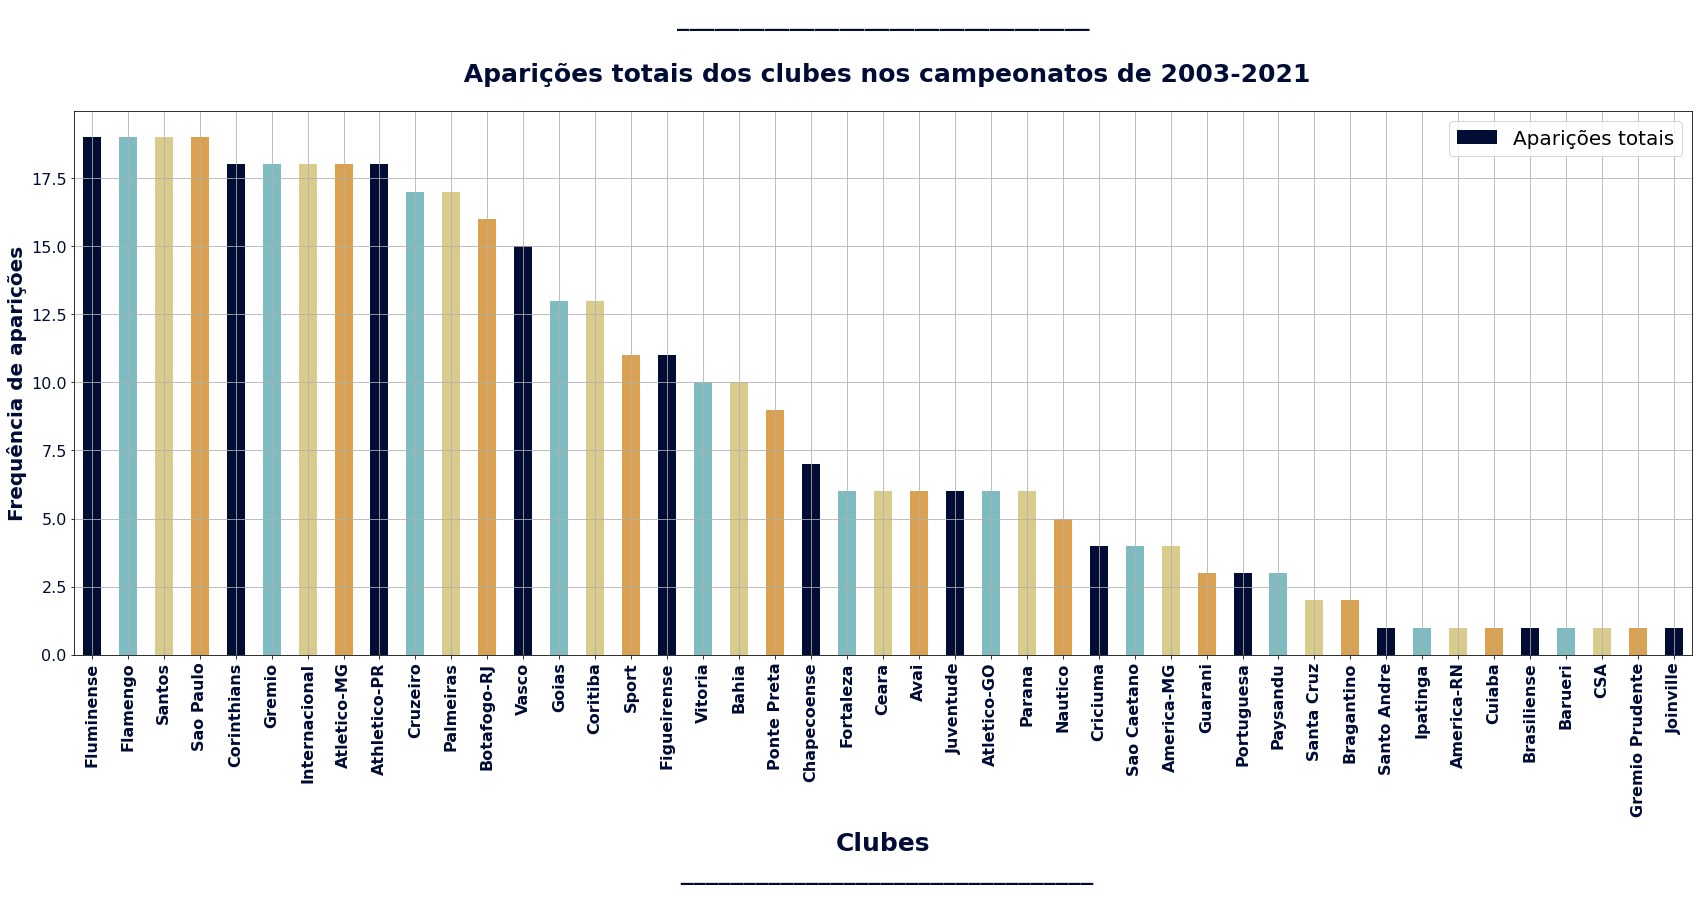

In [28]:
df_full_mandante_cont = df_full[df_full['rodada']==1].pivot_table(index='mandante',values='ano', aggfunc='count').reset_index().rename(columns={'mandante':'clube','ano':'aparicoes'})
df_full_visitante_cont = df_full[df_full['rodada']==1].pivot_table(index='visitante',values='ano', aggfunc='count').reset_index().rename(columns={'visitante':'clube','ano':'aparicoes'})

df_contagem_full = df_full_mandante_cont.merge(right=df_full_visitante_cont, on='clube', how='outer',suffixes=['_Mandantes','_Visitantes'])
df_contagem_full.fillna(0, inplace=True)
df_contagem_full['Aparicoes_Totais'] = df_contagem_full['aparicoes_Mandantes']+ df_contagem_full['aparicoes_Visitantes']

cores = ['#020D36','#7EBCC2','#D8CB8C','#DAA250']
df_contagem_full.sort_values(by='Aparicoes_Totais',ascending=False).plot(x='clube', y='Aparicoes_Totais',kind='bar', figsize=(29,10), color = cores);
plt.title('_________________________________\n \n Aparições totais dos clubes nos campeonatos de 2003-2021', fontsize = 25, fontweight = 'bold', color = '#020D36', pad = 30)
plt.xlabel('Clubes\n _________________________________\n', labelpad=15, fontsize = 25, color = '#020D36', fontweight = 'bold')
plt.ylabel('Frequência de aparições', color = '#020D36', fontweight = 'bold', fontsize =20)
plt.grid()
plt.xticks(color = '#020D36', fontweight = 'bold', fontsize = 16)
plt.yticks(color = '#020D36', fontsize = 16)
plt.legend(labels=['Aparições totais'], fontsize = (20));


### <i>4.10. Porcentagem da quantidade de times por estados (Brasileirão 2003-2021) </i> 🔣 󠀥󠀥󠀥󠀥󠀥

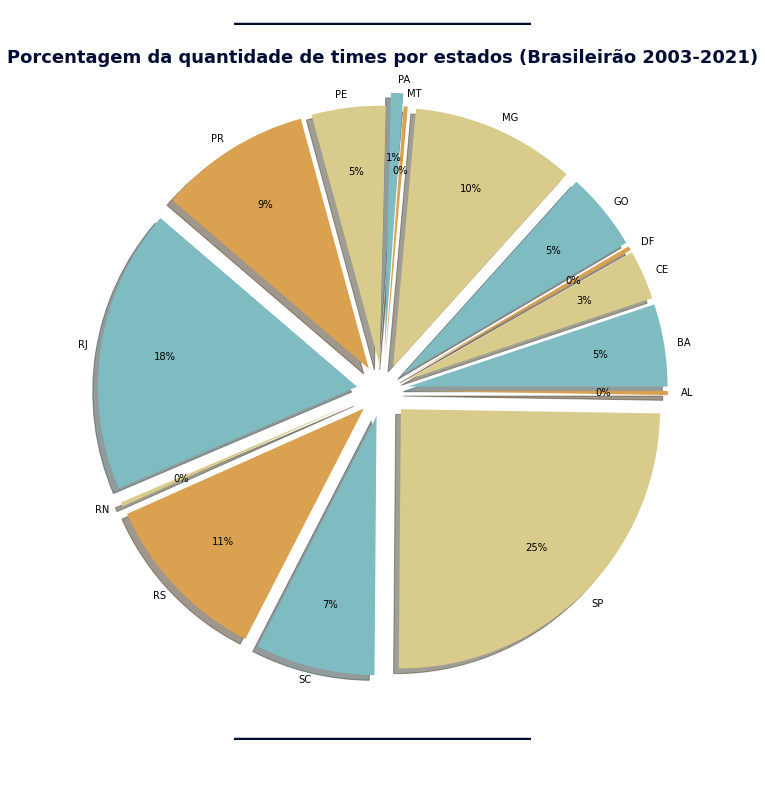

In [29]:
df_full_mandante_estado = df_full[df_full['rodada']==1].pivot_table(index='mandante_estado',values='ano', aggfunc='count').reset_index().rename(columns={'mandante_estado':'estados','ano':'aparicoes'})
df_full_visitante_estado = df_full[df_full['rodada']==1].pivot_table(index='visitante_estado',values='ano', aggfunc='count').reset_index().rename(columns={'visitante_estado':'estados','ano':'aparicoes'})

df_contagem_estados = df_full_mandante_estado.merge(right=df_full_visitante_estado, on='estados', how='outer',suffixes=['_Mandantes','_Visitantes'])
df_contagem_estados.fillna(0, inplace=True)
df_contagem_estados['Aparicoes_Totais'] = df_contagem_estados['aparicoes_Mandantes']+ df_contagem_estados['aparicoes_Visitantes']

cores = ['#7EBCC2','#D8CB8C','#DAA250']
fig = plt.figure(figsize = (9, 9))
axs= fig.add_axes([0, 0, 1, 1])

explodindo=[0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
axs.pie('Aparicoes_Totais', data=df_contagem_estados, autopct='%0.0f%%',pctdistance=0.75, colors=cores, labels=df_contagem_estados['estados'], labeldistance=1.05, explode = explodindo, shadow=True);
plt.title('_________________________________\n \nPorcentagem da quantidade de times por estados (Brasileirão 2003-2021)', fontsize = 18,  color = '#020D36', pad = -15, fontweight = 'bold')
plt.xlabel('_________________________________\n\n', fontsize = 18,  color = '#020D36', fontweight = 'bold')
fig.set_facecolor('#FFFFFF')


### <i>4.11. Quantidade de chutes a gol em função da média de gols</i> ⚽️🦶

* O time visitante tem um maior aproveitamento para conversão em gols de chutes em gol

In [30]:
teste = df_full_copia_corrigido.pivot_table(index = 'placar do mandante', values=['chutes a gol do mandante', 'chutes do mandante'], aggfunc='mean')
teste1 = df_full_copia_corrigido.pivot_table(index = 'placar do visitante', values=['chutes a gol do visitante', 'chutes do visitante'], aggfunc='mean')
juncao = teste.merge(teste1, on = teste.index)
juncao.set_index('key_0', inplace = True)
juncao.index.rename('Gols', inplace = True)

chutes_a_gol = px.bar(data_frame =juncao, x = juncao.index, y = ['chutes a gol do mandante', 'chutes a gol do visitante'], barmode='group', color_discrete_sequence=[
                 "#020D36", "#DAA250"], text_auto= '.2f')
                 
chutes_a_gol.update_layout(
    xaxis_title= {
        'text':'<b>Média de gols <br>_________________________________<br>⠀',
        'font_color': '#020D36',
        'font_size':20},
    yaxis_title={
        'text':'<b>Quantidade de chutes',
        'font_color': '#020D36',
        'font_size':20},
    title={
        'text': '<b>_________________________________<br>Quantidade de chutes a gol em função da média de gols',
        'x': 0.5,
        'y': 0.97,
        'font_color': '#020D36',
        'font_size':20},
    template = 'simple_white')



### <i>4.12. Quantidade de chutes em função da média de gols</i> 🥅⚽️

* O time visitante tem um maior aproveitamento para conversão em gols de chutes em geral

In [31]:
chutes = px.bar(data_frame =juncao, x = juncao.index, y = ['chutes do mandante', 'chutes do visitante'], barmode='group', color_discrete_sequence=[
                 "#020D36", "#DAA250"],text_auto= '.2f')

chutes.update_layout(
xaxis_title= {
    'text':'<b>Média de gols <br>_________________________________<br>⠀',
    'font_color': '#020D36',
    'font_size':20},
yaxis_title={
    'text':'<b>Quantidade de chutes',
    'font_color': '#020D36',
    'font_size':20},
title={
    'text': '<b>_________________________________<br>Quantidade de chutes em função da média de gols',
    'x': 0.5,
    'y': 0.97,
    'font_color': '#020D36',
    'font_size':20},
template = 'simple_white')